In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Multilayer
def dataLoader(x, y, n=1):
    D = np.random.permutation(np.c_[x,y])

    for i in range(len(x)//n):
        yield (D[i*n:i*n+n,:-2], D[i*n:i*n+n, -2:])

In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1], [1], [1]])   # OR

In [8]:
def logistic(x):
    return np.exp(x)/(1+np.exp(x))
def dlogistic(x):
    return logistic(x)*(1-logistic(x))

In [ ]:
# logistic

W = np.random.rand(X.shape[-1], Y.shape[-1])
B = np.random.rand(Y.shape[-1])

lr = 1e-3
epoch = 100000

J1 = lambda y, _y: -(y**np.log(_y)+(1-y)*np.log(1-_y))
J2 = lambda y, _y: (y-_y)**2
N=4

loss = list()

for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        # FeedForward
        z = x@W+B
        yhat1 = logistic(z[:,:1])
        yhat2 = z[:,1:]

        # y1 = sigmoid(x1w1 + x2w2) ==> NLL(Y[0])
        # y2 = x1w1 + x2w2 ==> SE(Y[1])

        # Back propagation
        dLoss1 = -(y[:,:1]-yhat1)
        dLoss2 = -(y[:,1:]-yhat2)
        dZ = dlogistic(z)*dLoss1
        dB = np.sum(dZ)+np.sum(dLoss2)
        dW = x.T@dZ + x.T@dLoss2
        B = B-lr*dB
        W = W-lr*dW

    if epoch % 100 == 0:
        loss.append(np.sum(J1(Y, logistic(X@W+B)[:,:1]) + np.sum(J2(Y, X@W+B)[:,1:])))

In [4]:
# sotfmax
# [0000] => 확률분포로 바꿔줌
# 확률이 제일 커야하는 max 외에는 지수에 의해서 0값이 안나옴
# output node에서 나온는 값을 activation function에 의해서 확률이 나옴
# 즉, x1,x2가 존재할때 exp(x1) / exp(x1) + exp(x2)로 값이 나온다
# 이때 실제 Y값과 비교하여 Loss를 구하고 이것을 cross entropy 라고 한다

# CE => -sum(i까지)(yi*log(yhati))
# sigmoid - BCE
# square - SE

In [5]:
def softmax(x):
    xmax = np.max(x, axis = 1, keepdims=1)
    _x = x - xmax
    return np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims=True)

In [15]:
Y = np.array([[1, 0],
              [0, 1],
              [0, 1],
              [0, 1]])
X = np.array([[0,0], [0,1], [1,0], [1,1]])

In [16]:
W = np.random.rand(X.shape[-1], Y.shape[-1])
B = np.random.rand(Y.shape[-1])

lr = 1e-2
epoch = 100000

J = lambda y, _y: -np.sum(y*np.log(_y))
N=4

loss = list()

for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        # FeedForward
        z = x@W+B
        yhat = softmax(z)

        # Back propagation
        dLoss = -(y-yhat)  # softmax-loss 미분
        dB = np.sum(dLoss)
        dW = x.T@dLoss
        B = B-lr*dB
        W = W-lr*dW

    if epoch % 100 == 0:
        loss.append(np.sum(J(Y, softmax(X@W+B))))

ValueError: operands could not be broadcast together with shapes (4,2) (4,) 

In [2]:
Y = np.array([[0],
              [1],
              [1],
              [0]])
X = np.array([[0,0], [0,1], [1,0], [1,1]])

In [3]:
def dataLoader(x, y, n=1):
    # shuffling
    # index를 mix해서 뽑아서 x,y element 뽑기 [i for i in range(len(x))]
    D = np.random.permutation(np.c_[x,y])

    # batch
    for i in range(len(x)//n):
        yield (D[i*n:i*n+n,:-1], D[i*n:i*n+n, -1:])

In [9]:
H = 2

W1 = np.random.rand(X.shape[-1], H)
B1 = np.random.rand(H)

W2 = np.random.rand(H, Y.shape[-1])
B2 = np.random.rand(Y.shape[-1])

lr = 1e-2
epoch = 100000

J = lambda y, _y: np.sum((y-_y)**2)
N=4

loss = list()
# Multi Layer Perceptron
# Hidden Layer; Activate Func. (Sigmoid-Logistic)
# Output Layer; Value compare => P(Logistic)
#                               , or P 분포 (Softmax)
for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        # FeedForward
        z1 = x@W1+B1
        x2 = logistic(z1)
        z2 = x2@W2 + B2
        

        # Back propagation
        dLoss = -(y-z2)  # SE
        dB2 = np.sum(dLoss)
        dW2 = x2.T@dLoss
        
        dz2 = dLoss@W2.T
        dz1 = dlogistic(z1)*dz2
        dB1 = np.sum(dz1)
        dW1 = x.T@dz1

        B1 = B1-lr*dB1
        W1 = W1-lr*dW1
        B2 = B2-lr*dB2
        W2 = W2-lr*dW2

    if epoch % 100 == 0:
        loss.append(np.sum(J(Y, logistic(X@W1+B1)@W2+B2)))

In [11]:
def softmax(x):
    xmax = np.max(x, axis = 1, keepdims=1)
    _x = x - xmax
    return np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims=True)

In [16]:
H = 2

W1 = np.random.rand(X.shape[-1], H)
B1 = np.random.rand(H)

W2 = np.random.rand(H, Y.shape[-1])
B2 = np.random.rand(Y.shape[-1])

lr = 1e-2
epoch = 100000

J = lambda y, _y: np.sum((y-_y)**2)
N=4

loss = list()
# Multi Layer Perceptron
# Hidden Layer; Activate Func. (Sigmoid-Logistic)
# Output Layer; Value compare => P(Logistic)
#                               , or P 분포 (Softmax)
for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        # FeedForward
        z1 = x@W1+B1
        x2 = logistic(z1)
        z2 = x2@W2 + B2
        
        p = logistic(z2)

        # Back propagation
        dLoss = -(y-p)  # SE
        dB2 = np.sum(dLoss)
        dW2 = x2.T@dLoss
        
        dz2 = dLoss@W2.T
        dz1 = dlogistic(z1)*dz2
        dB1 = np.sum(dz1)
        dW1 = x.T@dz1

        B1 = B1-lr*dB1
        W1 = W1-lr*dW1
        B2 = B2-lr*dB2
        W2 = W2-lr*dW2

    if epoch % 100 == 0:
        loss.append(np.sum(J(Y, softmax(logistic(X@W1+B1)@W2+B2))))

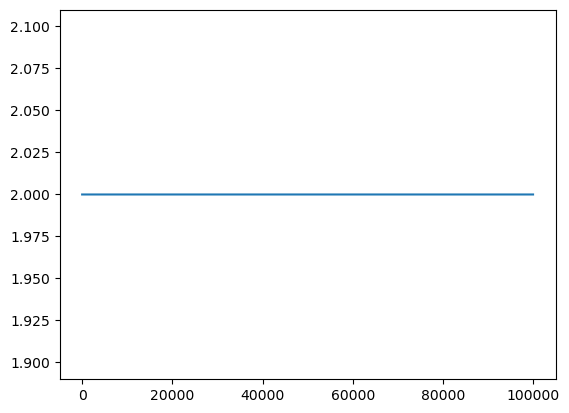

In [17]:
plt.plot(loss)